# Assignment 3

15-07-2023

<span style="color:White; font-family:Georgia; font-size:2em;">J.G.Jerlshin</span>


```1.Data Collection.```


In [2]:
## Downloaded the Dataset from Kaggle

```
2.Data Preprocessing
    o	Import the Libraries.
    o	Importing the dataset.
    o	Checking for Null Values.
    o	Data Visualization.
    o	Outlier Detection
    o	Splitting Dependent and Independent variables
    o	Perform Encoding
    o	Feature Scaling.
    o	Splitting Data into Train and Test
```

### Import the Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from scipy import stats

### Importing the dataset

In [6]:
data_dir = './dataset/Titanic-Dataset.csv'

dataset = pd.read_csv(data_dir)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
dataset.shape

(891, 12)

### Check for Null Values

In [9]:
dataset.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
dataset['Cabin_missing'] = dataset['Cabin'].isnull().astype(int)

dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
dataset.drop('Cabin', axis=1, inplace=True)

In [13]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Cabin_missing    0
dtype: int64

### Data Visualization

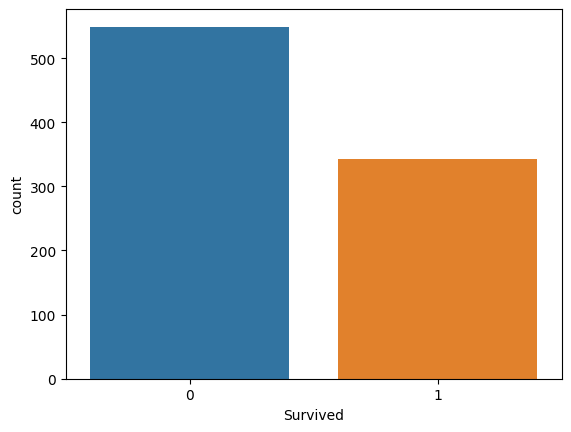

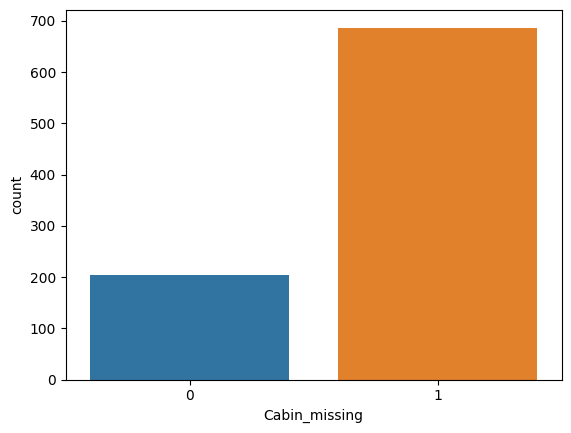

In [15]:
sns.countplot(x='Survived', data=dataset)
plt.show()

sns.countplot(x = 'Cabin_missing', data=dataset)
plt.show()

### Outlier Detection

<Axes: >

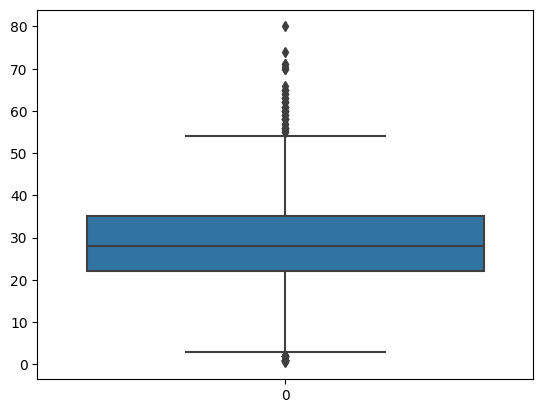

In [16]:
sns.boxplot(data=dataset.Age)

In [18]:
age_zscore = stats.zscore(dataset.Age)
age_zscore

0     -0.565736
1      0.663861
2     -0.258337
3      0.433312
4      0.433312
         ...   
886   -0.181487
887   -0.796286
888   -0.104637
889   -0.258337
890    0.202762
Name: Age, Length: 891, dtype: float64

<Axes: >

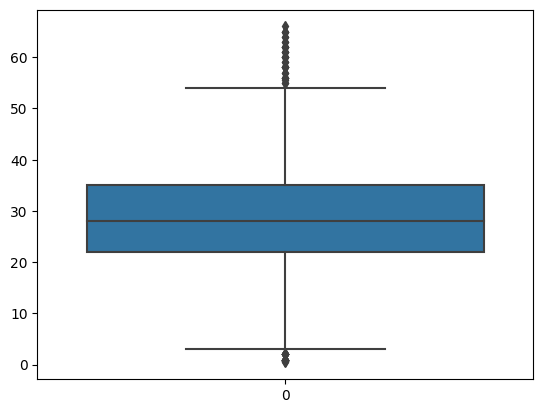

In [19]:
df_z = dataset[np.abs(age_zscore) <= 3]

sns.boxplot(df_z.Age)

### Splitting Dependent and Independent variables

In [21]:
x = df_z.iloc[:, [2, 4, 5, 6, 7, 10, 11]]
y = df_z["Survived"]

x.shape, y.shape

((884, 7), (884,))

### Perform Encoding

In [22]:
le = LabelEncoder()
x['Sex'] = le.fit_transform(x['Sex'])

x['Sex']

/tmp/ipykernel_48043/2418013019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Sex'] = le.fit_transform(x['Sex'])


0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 884, dtype: int64

In [23]:
x.Embarked.value_counts()

Embarked
S    642
C    166
Q     76
Name: count, dtype: int64

In [24]:
x = pd.get_dummies(x, columns=['Embarked'], drop_first=True)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin_missing,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,1,False,True
1,1,0,38.0,1,0,0,False,False
2,3,0,26.0,0,0,1,False,True
3,1,0,35.0,1,0,0,False,True
4,3,1,35.0,0,0,1,False,True


### Feature Scaling

In [25]:
scaler = StandardScaler()
x[['Age']] = scaler.fit_transform(x[['Age']])

x.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin_missing,Embarked_Q,Embarked_S
0,3,1,-0.562466,1,0,1,False,True
1,1,0,0.719303,1,0,0,False,False
2,3,0,-0.242024,0,0,1,False,True
3,1,0,0.478972,1,0,0,False,True
4,3,1,0.478972,0,0,1,False,True


### Split Data into Train and Test 

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((707, 8), (177, 8), (707,), (177,))